In [339]:
# Import

import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from datetime import datetime, timedelta
import yfinance as yf

In [340]:
# Import the dataset from yfinance
stock_symbol_BTC = "BTC-USD"  # Change this to the desired stock symbol
stock_symbol_ETH = "ETH-USD"  # Change this to the desired stock symbol
stock_symbol_BNB = "BNB-USD"  # Change this to the desired stock symbol
stock_symbol_XRP = "XRP-USD"  # Change this to the desired stock symbol
index_symbol_us10 = "^TNX"
# Calculate the start and end dates for the past 5 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=3*365)  # 5 years * 365 days

# Fetch historical price data
stock_data_BTC = yf.download(stock_symbol_BTC, start=start_date, end=end_date)
stock_data_ETH = yf.download(stock_symbol_ETH, start=start_date, end=end_date)
stock_data_BNB = yf.download(stock_symbol_BNB, start=start_date, end=end_date)
stock_data_XRP = yf.download(stock_symbol_XRP, start=start_date, end=end_date)
index_data_us10 = yf.download(index_symbol_us10, start=start_date, end=end_date)
# Print the retrieved data
print(stock_data_BTC)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2020-10-19  11495.038086  11799.092773  11408.290039  11742.037109   
2020-10-20  11745.974609  11999.917969  11681.480469  11916.334961   
2020-10-21  11913.077148  13184.566406  11900.928711  12823.689453   
2020-10-22  12801.635742  13161.593750  12717.093750  12965.891602   
2020-10-23  12971.548828  13015.961914  12752.647461  12931.539062   
...                  ...           ...           ...           ...   
2023-10-13  26752.878906  27092.697266  26686.322266  26862.375000   
2023-10-14  26866.203125 

In [341]:
# Define a window size of 5
short_window = 5

# Define a window size of 25
long_window = 25

# Bitcoin Dataframe
df_btc = stock_data_BTC[["Open","High","Low","Close","Volume"]]
df_btc = pd.DataFrame(df_btc)
df_btc["actual_returns"] = df_btc["Close"].pct_change()
df_btc["sma_5"] = df_btc["Close"].rolling(window=short_window).mean().dropna()
df_btc["sma_25"] = df_btc["Close"].rolling(window=long_window).mean().dropna()
df_btc

#ETH DataFrame
df_eth = stock_data_ETH[["Open","High","Low","Close","Volume"]]
df_eth = pd.DataFrame(df_eth)
df_eth["actual_returns"] = df_eth["Close"].pct_change()
df_eth["sma_5"] = df_eth["Close"].rolling(window=short_window).mean().dropna()
df_eth["sma_25"] = df_eth["Close"].rolling(window=long_window).mean().dropna()
df_eth

#BNB DataFrame
df_bnb = stock_data_BNB[["Open","High","Low","Close","Volume"]]
df_bnb = pd.DataFrame(df_bnb)
df_bnb["actual_returns"] = df_bnb["Close"].pct_change()
df_bnb["sma_5"] = df_bnb["Close"].rolling(window=short_window).mean().dropna()
df_bnb["sma_25"] = df_bnb["Close"].rolling(window=long_window).mean().dropna()
df_bnb

#XRP DataFrame
df_xrp = stock_data_XRP[["Open","High","Low","Close","Volume"]]
df_xrp = pd.DataFrame(df_xrp)
df_xrp["actual_returns"] = df_xrp["Close"].pct_change()
df_xrp["sma_5"] = df_xrp["Close"].rolling(window=short_window).mean().dropna()
df_xrp["sma_25"] = df_xrp["Close"].rolling(window=long_window).mean().dropna()
df_xrp

,Open,High,Low,Close,Volume,actual_returns,sma_5,sma_25
Date,,,,,,,,
2020-10-19,0.242308,0.249471,0.240497,0.245964,1435700560,NaN,NaN,NaN
2020-10-20,0.245927,0.249400,0.242562,0.243573,1526376279,-0.009721,NaN,NaN
2020-10-21,0.243485,0.255227,0.243179,0.251615,2306399543,0.033017,NaN,NaN
2020-10-22,0.251335,0.263463,0.251233,0.256807,2827483708,0.020635,NaN,NaN
2020-10-23,0.257326,0.259306,0.250713,0.254879,2125734863,-0.007508,0.250568,NaN
...,...,...,...,...,...,...,...,...
2023-10-13,0.483049,0.489789,0.479341,0.485699,696915013,0.005484,0.491650,0.511002
2023-10-14,0.485690,0.487980,0.483974,0.486775,357321203,0.002215,0.488360,0.509907
2023-10-15,0.486773,0.489992,0.485665,0.487846,385469444,0.002200,0.486442,0.508567


In [342]:
# Initialize the new Signal column to hold the trading signal

#btc
algorf_btc = df_btc.copy()
algorf_btc['Profit/Loss'] = 0
algorf_btc['Signal'] = 0.0
algorf_btc = algorf_btc.dropna()
algorf_btc

#eth
algorf_eth = df_eth.copy()
algorf_eth['Profit/Loss'] = 0
algorf_eth['Signal'] = 0.0
algorf_eth = algorf_eth.dropna()
algorf_eth

#bnb
algorf_bnb = df_bnb.copy()
algorf_bnb['Profit/Loss'] = 0
algorf_bnb['Signal'] = 0.0
algorf_bnb = algorf_bnb.dropna()
algorf_bnb

#xrp
algorf_xrp = df_xrp.copy()
algorf_xrp['Profit/Loss'] = 0
algorf_xrp['Signal'] = 0.0
algorf_xrp = algorf_xrp.dropna()
algorf_xrp

,Open,High,Low,Close,Volume,actual_returns,sma_5,sma_25,Profit/Loss,Signal
Date,,,,,,,,,,
2020-11-12,0.256258,0.258081,0.252839,0.254903,2443233108,-0.005292,0.253952,0.248290,0,0.0
2020-11-13,0.254903,0.265679,0.254091,0.265191,2989109717,0.040360,0.256202,0.249059,0,0.0
2020-11-14,0.265191,0.277014,0.262454,0.268342,4433908911,0.011882,0.259721,0.250049,0,0.0
2020-11-15,0.268342,0.276618,0.264645,0.269642,3613774298,0.004845,0.262867,0.250771,0,0.0
2020-11-16,0.269641,0.288008,0.268053,0.285520,4105697051,0.058885,0.268720,0.251919,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-10-13,0.483049,0.489789,0.479341,0.485699,696915013,0.005484,0.491650,0.511002,0,0.0
2023-10-14,0.485690,0.487980,0.483974,0.486775,357321203,0.002215,0.488360,0.509907,0,0.0
2023-10-15,0.486773,0.489992,0.485665,0.487846,385469444,0.002200,0.486442,0.508567,0,0.0


In [345]:
# Generate the trading signal 0 or 1,
# where 1 is the short-window (SMA5) greater than the long-window (SMA100)
# and 0 is when the condition is not met

#btc
algorf_btc["Signal"][short_window:] = np.where(
    algorf_btc["sma_5"][short_window:] > algorf_btc["sma_25"][short_window:], 1.0, 0.0
)

#eth
algorf_eth["Signal"][short_window:] = np.where(
    algorf_eth["sma_5"][short_window:] > algorf_eth["sma_25"][short_window:], 1.0, 0.0
)

#bnb
algorf_bnb["Signal"][short_window:] = np.where(
    algorf_bnb["sma_5"][short_window:] > algorf_bnb["sma_25"][short_window:], 1.0, 0.0
)

#xrp
algorf_xrp["Signal"][short_window:] = np.where(
    algorf_xrp["sma_5"][short_window:] > algorf_xrp["sma_25"][short_window:], 1.0, 0.0
)

# Review the DataFrame
#print(algorf_btc.tail(5))
algorf_eth.tail(5)
#print(algorf_bnb.tail(5))
#print(algorf_xrp.tail(5))

/var/folders/ht/y_wwy_fj1lb6tq55gtx7nmc00000gn/T/ipykernel_55867/1733752116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  algorf_btc["Signal"][short_window:] = np.where(
/var/folders/ht/y_wwy_fj1lb6tq55gtx7nmc00000gn/T/ipykernel_55867/1733752116.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  algorf_eth["Signal"][short_window:] = np.where(
/var/folders/ht/y_wwy_fj1lb6tq55gtx7nmc00000gn/T/ipykernel_55867/1733752116.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,Open,High,Low,Close,Volume,actual_returns,sma_5,sma_25,Profit/Loss,Signal
Date,,,,,,,,,,
2023-10-13,1539.432861,1571.750610,1537.921143,1552.089478,4575141511,0.008104,1561.095264,1616.909897,0,0.0
2023-10-14,1552.263794,1560.325073,1545.738770,1555.256836,2429214718,0.002041,1556.185303,1613.378384,0,0.0
2023-10-15,1555.076050,1565.760864,1550.554565,1558.069824,2923337883,0.001809,1554.256665,1610.785552,0,0.0
2023-10-16,1558.313477,1628.156250,1555.989624,1600.534302,8846928526,0.027255,1561.112573,1611.434644,0,0.0
2023-10-17,1600.635620,1601.294678,1554.402954,1565.439575,5032686973,-0.021927,1566.278003,1610.321494,0,0.0


In [347]:
algorf_btc["Entry/Exit"] = algorf_btc["Signal"].diff()
algorf_eth["Entry/Exit"] = algorf_eth["Signal"].diff()
algorf_bnb["Entry/Exit"] = algorf_bnb["Signal"].diff()
algorf_xrp["Entry/Exit"] = algorf_xrp["Signal"].diff()
#algorf_btc.dropna()
algorf_xrp

,Open,High,Low,Close,Volume,actual_returns,sma_5,sma_25,Profit/Loss,Signal,Entry/Exit
Date,,,,,,,,,,,
2020-11-12,0.256258,0.258081,0.252839,0.254903,2443233108,-0.005292,0.253952,0.248290,0,0.0,NaN
2020-11-13,0.254903,0.265679,0.254091,0.265191,2989109717,0.040360,0.256202,0.249059,0,0.0,0.0
2020-11-14,0.265191,0.277014,0.262454,0.268342,4433908911,0.011882,0.259721,0.250049,0,0.0,0.0
2020-11-15,0.268342,0.276618,0.264645,0.269642,3613774298,0.004845,0.262867,0.250771,0,0.0,0.0
2020-11-16,0.269641,0.288008,0.268053,0.285520,4105697051,0.058885,0.268720,0.251919,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-13,0.483049,0.489789,0.479341,0.485699,696915013,0.005484,0.491650,0.511002,0,0.0,0.0
2023-10-14,0.485690,0.487980,0.483974,0.486775,357321203,0.002215,0.488360,0.509907,0,0.0,0.0
2023-10-15,0.486773,0.489992,0.485665,0.487846,385469444,0.002200,0.486442,0.508567,0,0.0,0.0


In [348]:
#Bitcoin visualisation

# Visualize exit position relative to close price
exit = algorf_btc[algorf_btc["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color="yellow",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize entry position relative to close price
entry = algorf_btc[algorf_btc["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color="purple",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize close price for the investment
security_close = algorf_btc[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize moving averages
moving_avgs = algorf_btc[["sma_5", "sma_25"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400)

# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot
entry_exit_plot.opts(
    title="BTC - SMA5, SMA25, Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [349]:
#Ethereum visualisation

# Visualize exit position relative to close price
exit = algorf_eth[algorf_eth["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color="yellow",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize entry position relative to close price
entry = algorf_eth[algorf_eth["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color="purple",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize close price for the investment
security_close = algorf_eth[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize moving averages
moving_avgs = algorf_eth[["sma_5", "sma_25"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400)

# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot
entry_exit_plot.opts(
    title="ETH - SMA5, SMA25, Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [350]:
#Binance visualisation

# Visualize exit position relative to close price
exit = algorf_bnb[algorf_bnb["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color="yellow",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize entry position relative to close price
entry = algorf_bnb[algorf_bnb["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color="purple",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize close price for the investment
security_close = algorf_bnb[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize moving averages
moving_avgs = algorf_bnb[["sma_5", "sma_25"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400)

# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot
entry_exit_plot.opts(
    title="BNB - SMA5, SMA25, Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [351]:
#XRP visualisation

# Visualize exit position relative to close price
exit = algorf_xrp[algorf_xrp["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color="yellow",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize entry position relative to close price
entry = algorf_xrp[algorf_xrp["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color="purple",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize close price for the investment
security_close = algorf_xrp[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize moving averages
moving_avgs = algorf_xrp[["sma_5", "sma_25"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400)

# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot
entry_exit_plot.opts(
    title="XRP - SMA5, SMA25, Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [315]:
# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

In [352]:
# Buy a 500 share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
algorf_btc['Position'] = share_size * algorf_btc['Signal']
algorf_eth['Position'] = share_size * algorf_eth['Signal']
algorf_bnb['Position'] = share_size * algorf_bnb['Signal']
algorf_xrp['Position'] = share_size * algorf_xrp['Signal']
# Determine the points in time where a 500 share position is bought or sold
algorf_btc['Entry/Exit Position'] = algorf_btc['Position'].diff()
algorf_eth['Entry/Exit Position'] = algorf_eth['Position'].diff()
algorf_bnb['Entry/Exit Position'] = algorf_bnb['Position'].diff()
algorf_xrp['Entry/Exit Position'] = algorf_xrp['Position'].diff()
# Multiply the close price by the number of shares held, or the Position
algorf_btc['Portfolio Holdings'] = algorf_btc['Close'] * algorf_btc['Position']
algorf_eth['Portfolio Holdings'] = algorf_eth['Close'] * algorf_eth['Position']
algorf_bnb['Portfolio Holdings'] = algorf_bnb['Close'] * algorf_bnb['Position']
algorf_xrp['Portfolio Holdings'] = algorf_xrp['Close'] * algorf_xrp['Position']
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
algorf_btc['Portfolio Cash'] = initial_capital - (algorf_btc['Close'] * algorf_btc['Entry/Exit Position']).cumsum()
algorf_eth['Portfolio Cash'] = initial_capital - (algorf_eth['Close'] * algorf_eth['Entry/Exit Position']).cumsum() 
algorf_bnb['Portfolio Cash'] = initial_capital - (algorf_bnb['Close'] * algorf_bnb['Entry/Exit Position']).cumsum() 
algorf_xrp['Portfolio Cash'] = initial_capital - (algorf_xrp['Close'] * algorf_xrp['Entry/Exit Position']).cumsum() 
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
algorf_btc['Portfolio Total'] = algorf_btc['Portfolio Cash'] + algorf_btc['Portfolio Holdings']
algorf_eth['Portfolio Total'] = algorf_eth['Portfolio Cash'] + algorf_eth['Portfolio Holdings']
algorf_bnb['Portfolio Total'] = algorf_bnb['Portfolio Cash'] + algorf_bnb['Portfolio Holdings']
algorf_xrp['Portfolio Total'] = algorf_xrp['Portfolio Cash'] + algorf_xrp['Portfolio Holdings']
# Calculate the portfolio daily returns
algorf_btc['Portfolio Daily Returns'] = algorf_btc['Portfolio Total'].pct_change()
algorf_eth['Portfolio Daily Returns'] = algorf_eth['Portfolio Total'].pct_change()
algorf_bnb['Portfolio Daily Returns'] = algorf_bnb['Portfolio Total'].pct_change()
algorf_xrp['Portfolio Daily Returns'] = algorf_xrp['Portfolio Total'].pct_change()
# Calculate the portfolio cumulative returns
algorf_btc['Portfolio Cumulative Returns'] = (1 + algorf_btc['Portfolio Daily Returns']).cumprod() - 1
algorf_eth['Portfolio Cumulative Returns'] = (1 + algorf_eth['Portfolio Daily Returns']).cumprod() - 1
algorf_bnb['Portfolio Cumulative Returns'] = (1 + algorf_bnb['Portfolio Daily Returns']).cumprod() - 1
algorf_xrp['Portfolio Cumulative Returns'] = (1 + algorf_xrp['Portfolio Daily Returns']).cumprod() - 1

In [317]:
# Visualize exit position relative to total portfolio value
# BTC
exit = algorf_btc[algorf_btc['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='yellow',
    marker='v',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize entry position relative to total portfolio value
entry = algorf_btc[algorf_btc['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='purple',
    marker='^',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize the value of the total portfolio
total_portfolio_value = algorf_btc[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    xlabel='Date',
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(
    title="BTC Algorithm - Total Portfolio Value",
    yformatter='%.0f'
)

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

In [353]:
# Visualize exit position relative to total portfolio value
# ETH
exit = algorf_eth[algorf_eth['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='yellow',
    marker='v',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize entry position relative to total portfolio value
entry = algorf_eth[algorf_eth['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='purple',
    marker='^',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize the value of the total portfolio
total_portfolio_value = algorf_eth[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    xlabel='Date',
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(
    title="ETH Algorithm - Total Portfolio Value",
    yformatter='%.0f'
)

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

In [354]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X_btc = algorf_btc[["sma_5", "sma_25"]].copy()
X_eth = algorf_eth[["sma_5", "sma_25"]].copy()
X_bnb = algorf_bnb[["sma_5", "sma_25"]].copy()
X_xrp = algorf_xrp[["sma_5", "sma_25"]].copy()
# Display sample data
display(X_btc.head())
display(X_eth.head())
display(X_bnb.head())
display(X_xrp.head())

,sma_5,sma_25
Date,,
2020-11-12,15616.093750,13948.657578
2020-11-13,15783.741992,14131.688438
2020-11-14,15930.906641,14297.760586
2020-11-15,16063.843750,14423.036523
2020-11-16,16266.798047,14573.045313


,sma_5,sma_25
Date,,
2020-11-12,454.272656,410.851049
2020-11-13,458.486987,414.638682
2020-11-14,461.684344,418.279199
2020-11-15,461.260236,420.493964
2020-11-16,460.656189,422.340657


,sma_5,sma_25
Date,,
2020-11-12,28.017493,29.003270
2020-11-13,27.992904,28.933554
2020-11-14,27.976540,28.898865
2020-11-15,27.862078,28.812812
2020-11-16,27.883664,28.709048


,sma_5,sma_25
Date,,
2020-11-12,0.253952,0.248290
2020-11-13,0.256202,0.249059
2020-11-14,0.259721,0.250049
2020-11-15,0.262867,0.250771
2020-11-16,0.268720,0.251919


In [355]:
# Copy the new signal column to a new Series called y.
y_btc = algorf_btc["Signal"].copy()
y_eth = algorf_eth["Signal"].copy()
y_bnb = algorf_bnb["Signal"].copy()
y_xrp = algorf_xrp["Signal"].copy()

In [356]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [357]:
# Select the start of the training period
training_begin = X_btc.index.min()

# Display the training begin date
print(training_begin)

2020-11-12 00:00:00


In [358]:
# Select the ending period for the training data with an offset of 3 months
training_end = X_btc.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2021-02-12 00:00:00


In [359]:
# Generate the X_train and y_train DataFrames
X_train_btc = X_btc.loc[training_begin:training_end]
X_train_eth = X_eth.loc[training_begin:training_end]
X_train_bnb = X_bnb.loc[training_begin:training_end]
X_train_xrp = X_xrp.loc[training_begin:training_end]

y_train_btc = y_btc.loc[training_begin:training_end]
y_train_eth = y_eth.loc[training_begin:training_end]
y_train_bnb = y_bnb.loc[training_begin:training_end]
y_train_xrp = y_xrp.loc[training_begin:training_end]

# Display sample data
display(X_train_btc.head())
display(X_train_eth.head())
display(X_train_bnb.head())
display(X_train_xrp.head())

,sma_5,sma_25
Date,,
2020-11-12,15616.093750,13948.657578
2020-11-13,15783.741992,14131.688438
2020-11-14,15930.906641,14297.760586
2020-11-15,16063.843750,14423.036523
2020-11-16,16266.798047,14573.045313


,sma_5,sma_25
Date,,
2020-11-12,454.272656,410.851049
2020-11-13,458.486987,414.638682
2020-11-14,461.684344,418.279199
2020-11-15,461.260236,420.493964
2020-11-16,460.656189,422.340657


,sma_5,sma_25
Date,,
2020-11-12,28.017493,29.003270
2020-11-13,27.992904,28.933554
2020-11-14,27.976540,28.898865
2020-11-15,27.862078,28.812812
2020-11-16,27.883664,28.709048


,sma_5,sma_25
Date,,
2020-11-12,0.253952,0.248290
2020-11-13,0.256202,0.249059
2020-11-14,0.259721,0.250049
2020-11-15,0.262867,0.250771
2020-11-16,0.268720,0.251919


In [360]:
# Generate the X_test and y_test DataFrames
X_test_btc = X_btc.loc[training_end:]
X_test_eth = X_eth.loc[training_end:]
X_test_bnb = X_bnb.loc[training_end:]
X_test_xrp = X_xrp.loc[training_end:]

y_test_btc = y_btc.loc[training_end:]
y_test_eth = y_eth.loc[training_end:]
y_test_bnb = y_bnb.loc[training_end:]
y_test_xrp = y_xrp.loc[training_end:]


In [325]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [375]:
# Splitting into Train and Test sets
X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(X_btc, y_btc, random_state=78)
X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(X_eth, y_eth, random_state=78)
X_train_bnb, X_test_bnb, y_train_bnb, y_test_bnb = train_test_split(X_bnb, y_bnb, random_state=78)
X_train_xrp, X_test_xrp, y_train_xrp, y_test_xrp = train_test_split(X_xrp, y_xrp, random_state=78)

In [376]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler_btc = scaler.fit(X_train_btc)
X_scaler_eth = scaler.fit(X_train_eth)
X_scaler_bnb = scaler.fit(X_train_bnb)
X_scaler_xrp = scaler.fit(X_train_xrp)
# Scaling data
X_train_scaled_btc = X_scaler_btc.transform(X_train_btc)
X_train_scaled_eth = X_scaler_eth.transform(X_train_eth)
X_train_scaled_bnb = X_scaler_bnb.transform(X_train_bnb)
X_train_scaled_xrp = X_scaler_xrp.transform(X_train_xrp)

X_test_scaled_btc = X_scaler_btc.transform(X_test_btc)
X_test_scaled_eth = X_scaler_eth.transform(X_test_eth)
X_test_scaled_bnb = X_scaler_bnb.transform(X_test_bnb)
X_test_scaled_xrp = X_scaler_xrp.transform(X_test_xrp)

In [377]:
# Create a random forest classifier
rf_model_btc = RandomForestClassifier(n_estimators=150, random_state=78)
rf_model_eth = RandomForestClassifier(n_estimators=150, random_state=78)
rf_model_bnb = RandomForestClassifier(n_estimators=150, random_state=78)
rf_model_xrp = RandomForestClassifier(n_estimators=150, random_state=78)

In [379]:
# Fitting the model
rf_model_btc = rf_model_btc.fit(X_train_scaled_btc, y_train_btc)
rf_model_eth = rf_model_eth.fit(X_train_scaled_eth, y_train_eth)
rf_model_bnb = rf_model_bnb.fit(X_train_scaled_bnb, y_train_bnb)
rf_model_xrp = rf_model_xrp.fit(X_train_scaled_xrp, y_train_xrp)

In [380]:
# Making predictions using the testing data
predictions_test_btc = rf_model_btc.predict(X_test_scaled_btc)
predictions_test_eth = rf_model_eth.predict(X_test_scaled_eth)
predictions_test_bnb = rf_model_bnb.predict(X_test_scaled_bnb)
predictions_test_xrp = rf_model_xrp.predict(X_test_scaled_xrp)
# Making predictions using the training data
predictions_train_btc = rf_model_btc.predict(X_train_scaled_btc)
predictions_train_eth = rf_model_eth.predict(X_train_scaled_eth)
predictions_train_bnb = rf_model_bnb.predict(X_train_scaled_bnb)
predictions_train_xrp = rf_model_xrp.predict(X_train_scaled_xrp)

In [381]:
# Create a predictions DataFrame
#BTC
predictions_df_btc = pd.DataFrame(index=X_test_btc.index)
predictions_df_btc["predicted_signal"] = predictions_test_btc
#ETH
predictions_df_eth = pd.DataFrame(index=X_test_eth.index)
predictions_df_eth["predicted_signal"] = predictions_test_eth
#BNB
predictions_df_bnb = pd.DataFrame(index=X_test_bnb.index)
predictions_df_bnb["predicted_signal"] = predictions_test_bnb
#XRP
predictions_df_xrp = pd.DataFrame(index=X_test_xrp.index)
predictions_df_xrp["predicted_signal"] = predictions_test_xrp
predictions_df_xrp

,predicted_signal
Date,
2022-10-31,0.0
2021-12-14,0.0
2021-11-13,1.0
2022-05-26,0.0
2022-11-17,0.0
...,...
2023-06-05,1.0
2023-06-09,1.0
2021-10-03,1.0


In [387]:
#Join dataframes with testing predicted trading signal
#BTC
new_btc_df = pd.concat([algorf_btc,predictions_df_btc],axis=1,join="inner")
new_btc_df["trading_algorithm_returns"] = new_btc_df["actual_returns"] * new_btc_df["predicted_signal"]

#ETH
new_eth_df = pd.concat([algorf_eth,predictions_df_eth],axis=1,join="inner")
new_eth_df["trading_algorithm_returns"] = new_eth_df["actual_returns"] * new_eth_df["predicted_signal"]

#BNB
new_bnb_df = pd.concat([algorf_eth,predictions_df_bnb],axis=1,join="inner")
new_bnb_df["trading_algorithm_returns"] = new_bnb_df["actual_returns"] * new_bnb_df["predicted_signal"]

#XRP
new_xrp_df = pd.concat([algorf_xrp,predictions_df_xrp],axis=1,join="inner")
new_xrp_df["trading_algorithm_returns"] = new_xrp_df["actual_returns"] * new_xrp_df["predicted_signal"]

<Axes: title={'center': 'XRP'}, xlabel='Date'>

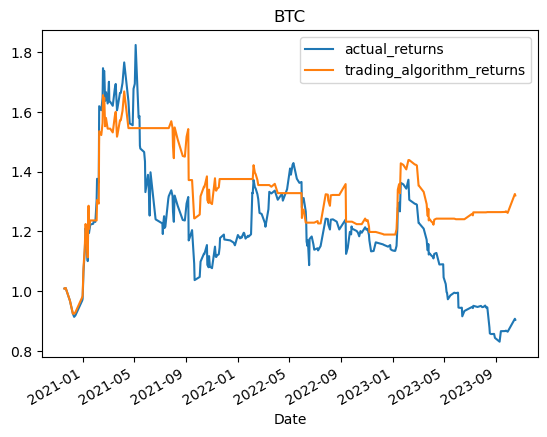

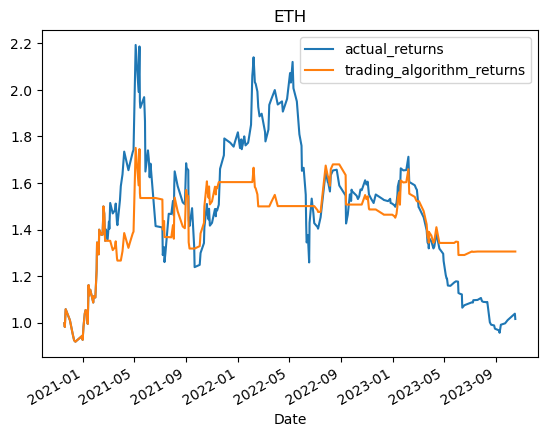

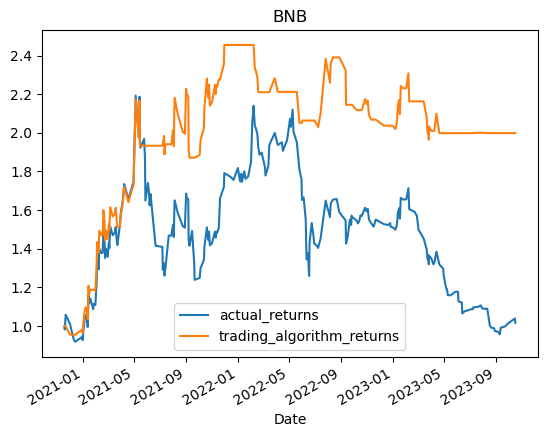

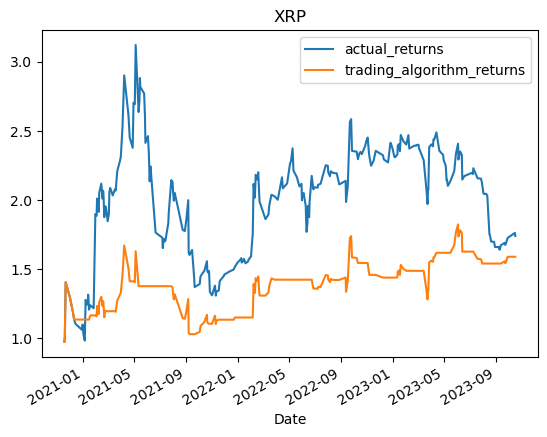

In [389]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + new_btc_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot(title = "BTC")
(1 + new_eth_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot(title = "ETH")
(1 + new_bnb_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot(title = "BNB")
(1 + new_xrp_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot(title = "XRP")

In [392]:
# Calculating the confusion matrix
# Confusion matrix BTC
cm_btc = confusion_matrix(y_test_btc, predictions_test_btc)
cm_df_btc = pd.DataFrame(
    cm_btc, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score BTC
acc_score_btc = accuracy_score(y_test_btc, predictions_test_btc)

#Confusion matrix ETH
cm_eth = confusion_matrix(y_test_eth, predictions_test_eth)
cm_df_eth = pd.DataFrame(
    cm_eth, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score ETH
acc_score_eth = accuracy_score(y_test_eth, predictions_test_eth)

#Confusion matrix BNB
cm_bnb = confusion_matrix(y_test_bnb, predictions_test_bnb)
cm_df_bnb = pd.DataFrame(
    cm_bnb, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score BNB
acc_score_bnb = accuracy_score(y_test_bnb, predictions_test_bnb)

#Confusion matrix XRP
cm_xrp = confusion_matrix(y_test_xrp, predictions_test_xrp)
cm_df_xrp = pd.DataFrame(
    cm_xrp, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score XRP
acc_score_xrp = accuracy_score(y_test_xrp, predictions_test_xrp)


In [391]:
# Displaying results BTC
print("Confusion Matrix BTC")
display(cm_df_btc)
print(f"Accuracy Score : {acc_score_btc}")
print("Classification Report")
print(classification_report(y_test_btc, predictions_test_btc))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,122,7
Actual 1,5,134


Accuracy Score : 0.9365671641791045
Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       129
         1.0       0.96      0.92      0.94       139

    accuracy                           0.94       268
   macro avg       0.94      0.94      0.94       268
weighted avg       0.94      0.94      0.94       268



In [393]:
# Displaying results ETH
print("Confusion Matrix ETH")
display(cm_df_eth)
print(f"Accuracy Score : {acc_score_eth}")
print("Classification Report")
print(classification_report(y_test_eth, predictions_test_eth))

Confusion Matrix ETH


,Predicted 0,Predicted 1
Actual 0,121,3
Actual 1,5,139


Accuracy Score : 0.9701492537313433
Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       124
         1.0       0.98      0.97      0.97       144

    accuracy                           0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268



In [394]:
# Displaying results BNB
print("Confusion Matrix BNB")
display(cm_df_bnb)
print(f"Accuracy Score : {acc_score_bnb}")
print("Classification Report")
print(classification_report(y_test_bnb, predictions_test_bnb))

Confusion Matrix BNB


,Predicted 0,Predicted 1
Actual 0,126,5
Actual 1,10,127


Accuracy Score : 0.9440298507462687
Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       131
         1.0       0.96      0.93      0.94       137

    accuracy                           0.94       268
   macro avg       0.94      0.94      0.94       268
weighted avg       0.94      0.94      0.94       268



In [395]:
# Displaying results BNB
print("Confusion Matrix XRP")
display(cm_df_xrp)
print(f"Accuracy Score : {acc_score_xrp}")
print("Classification Report")
print(classification_report(y_test_xrp, predictions_test_xrp))

Confusion Matrix XRP


,Predicted 0,Predicted 1
Actual 0,138,1
Actual 1,10,119


Accuracy Score : 0.9589552238805971
Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       139
         1.0       0.99      0.92      0.96       129

    accuracy                           0.96       268
   macro avg       0.96      0.96      0.96       268
weighted avg       0.96      0.96      0.96       268

